In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import math
from fileinput import FileInput 

In [41]:
file = "latenessIncrease3with20"

In [42]:
#"C:/Users/flavi/Travail/Switch-23/DataScript/SimResultat/latenessIncrease3with20.csv"
with FileInput("C:/Users/flavi/Travail/Switch-23/DataScript/SimResultat/"+file+".csv", inplace=True) as f: 
  
        # Iterating over every and changing
        # the search_text with replace_text
        # using the replace function
        for line in f:
            line = line.replace("file_list.header","")
            line = line.replace("],[","\n")
            line = line.replace("]","")
            line = line.replace("[","")
            print(line,end='')

In [43]:
road = gpd.read_file("C:/Users/flavi/Travail/Switch-23/includes/tests/roadImportance4/roads.shp")
gama_file = pd.read_csv("C:/Users/flavi/Travail/Switch-23/DataScript/SimResultat/"+file+".csv")

In [44]:
gama_file

,ID,TopoId,distance,entry date,duration,mean speed,lateness,activity
0,'Car106858','TRONROUT0000000073469796',88,'2023-10-12 03:57:00',5.0,63,0,0
1,'Car19725','TRONROUT0000000073493431',28,'2023-10-12 03:57:00',5.0,20,0,0
2,'Car117123','TRONROUT0000000073517178',64,'2023-10-12 03:57:00',10.0,23,0,3
3,'Car20994','TRONROUT0000000073506378',65,'2023-10-12 03:57:00',10.0,24,0,0
4,'Car106858','TRONROUT0000000073469796',88,'2023-10-12 03:57:05',5.0,63,0,0
...,...,...,...,...,...,...,...,...
100170438,'Car4377','TRONROUT0000000073479437',15,'2023-10-13 00:45:53',3.0,18,0,0
100170439,'Car4377','TRONROUT0000000073479388',17,'2023-10-13 00:45:56',3.0,20,0,0
100170440,'Car4377','TRONROUT0000002223373492',33,'2023-10-13 00:45:59',2.0,59,0,0
100170441,'Car4377','TRONROUT0000002223373486',122,'2023-10-13 00:46:01',7.0,63,0,0


In [45]:
gama_file['late max'] = gama_file['lateness']
gama_file['late mean'] = gama_file['lateness']
traited_file = gama_file.groupby(['TopoId'],group_keys=True).agg({
                                        "distance": lambda x: list(np.unique(x))[0],\
                                        "duration": lambda x: np.mean(x),\
                                        "mean speed":lambda x: np.mean(x),\
                                        "late max" : lambda x: np.max(x),\
                                        "late mean": lambda x: np.mean(x),\
                                        "ID" : lambda x:len(list(x))
                                    })
traited_file = traited_file.reset_index()
traited_file['TopoId'] = traited_file['TopoId'].map(lambda x : (x.replace("'","")))
traited_file = traited_file.rename(columns ={"ID":"frequentation"})
traited_file
#gama_file.to_csv("C:/Users/flavi/Travail/Switch-23/models/logs_file/meanMap.csv")

,TopoId,distance,duration,mean speed,late max,late mean,frequentation
0,TRONROUT0000000073456159,7,1.495268,20.561514,0,0.000000,634
1,TRONROUT0000000073456162,15,1.986792,36.237736,0,0.000000,1060
2,TRONROUT0000000073456164,30,3.475410,38.262295,0,0.000000,671
3,TRONROUT0000000073456167,13,5.989124,14.521450,2,0.001208,1655
4,TRONROUT0000000073456168,129,13.525088,40.915901,5,0.067845,1415
...,...,...,...,...,...,...,...
8174,TRONROUT0000002330723029,149,6.924851,82.429954,4,0.004007,13227
8175,TRONROUT0000002330723030,176,8.869634,73.782198,0,0.000000,12695
8176,TRONROUT0000002330723032,13,3.646959,19.294341,0,0.000000,14208
8177,TRONROUT0000002330723033,25,6.143418,25.085600,6,0.002764,13750


In [46]:
#pd.concat([gama_file,road], keys=['topoID','ID'])
roadMean = traited_file.merge(road, left_on='TopoId', right_on='ID')

In [47]:
roadMean = gpd.GeoDataFrame(roadMean)
roadMean

,TopoId,distance,duration,mean speed,late max,late mean,frequentation,ID,NATURE,IMPORTANCE,NB_VOIES,SENS,VIT_MOY_VL,LARGEUR,VEHICULES,geometry
0,TRONROUT0000000073456159,7,1.495268,20.561514,0,0.000000,634,TRONROUT0000000073456159,Route à 1 chaussée,3,3.0,Sens inverse,45,9,0,"LINESTRING Z (572182.500 6293613.500 151.500, ..."
1,TRONROUT0000000073456159,7,1.495268,20.561514,0,0.000000,634,TRONROUT0000000073456159,Route à 1 chaussée,3,3.0,Sens direct,45,9,0,"LINESTRING Z (572182.500 6293613.500 151.500, ..."
2,TRONROUT0000000073456162,15,1.986792,36.237736,0,0.000000,1060,TRONROUT0000000073456162,Route à 1 chaussée,3,3.0,Sens inverse,45,9,0,"LINESTRING Z (572068.000 6293497.800 139.500, ..."
3,TRONROUT0000000073456162,15,1.986792,36.237736,0,0.000000,1060,TRONROUT0000000073456162,Route à 1 chaussée,3,3.0,Sens direct,45,9,0,"LINESTRING Z (572068.000 6293497.800 139.500, ..."
4,TRONROUT0000000073456164,30,3.475410,38.262295,0,0.000000,671,TRONROUT0000000073456164,Route à 1 chaussée,3,3.0,Sens inverse,45,9,0,"LINESTRING Z (572177.300 6293608.100 151.000, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,TRONROUT0000002330723030,176,8.869634,73.782198,0,0.000000,12695,TRONROUT0000002330723030,Route à 2 chaussées,3,2.0,Sens direct,70,5.5,0,"LINESTRING Z (571116.200 6271503.200 149.400, ..."
10680,TRONROUT0000002330723032,13,3.646959,19.294341,0,0.000000,14208,TRONROUT0000002330723032,Rond-point,3,2.0,Sens direct,25,5,0 2,"LINESTRING Z (571075.200 6271505.900 149.100, ..."
10681,TRONROUT0000002330723033,25,6.143418,25.085600,6,0.002764,13750,TRONROUT0000002330723033,Rond-point,3,2.0,Sens direct,25,5,0 2,"LINESTRING Z (571068.500 6271495.000 149.300, ..."
10682,TRONROUT0000002330723235,38,4.726617,32.762599,0,0.000000,17620,TRONROUT0000002330723235,Route à 1 chaussée,3,4.0,Sens inverse,45,12,0,"LINESTRING Z (573809.500 6276996.600 142.600, ..."


In [48]:
roadMean.to_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/"+file+".shp")

C:\Users\flavi\AppData\Local\Temp\ipykernel_14720\1226853749.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  roadMean.to_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/"+file+".shp")


In [ ]:
roadMean['lateness'] = roadMean['lateness'].map(lambda x : 0 if x==0 else math.log(x,))
roadMean['lateness'] = roadMean['lateness'].map(lambda x : 6000 if x>6000 else x)

In [49]:
roadMean = gpd.read_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/"+file+".shp")
#roadMean = gpd.read_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/meanMap-10OnRoad1.shp")


In [ ]:
roadMean

Text(0.5, 1.0, 'roads duration (109440 individu, road importance 3) increase 3 with 20')

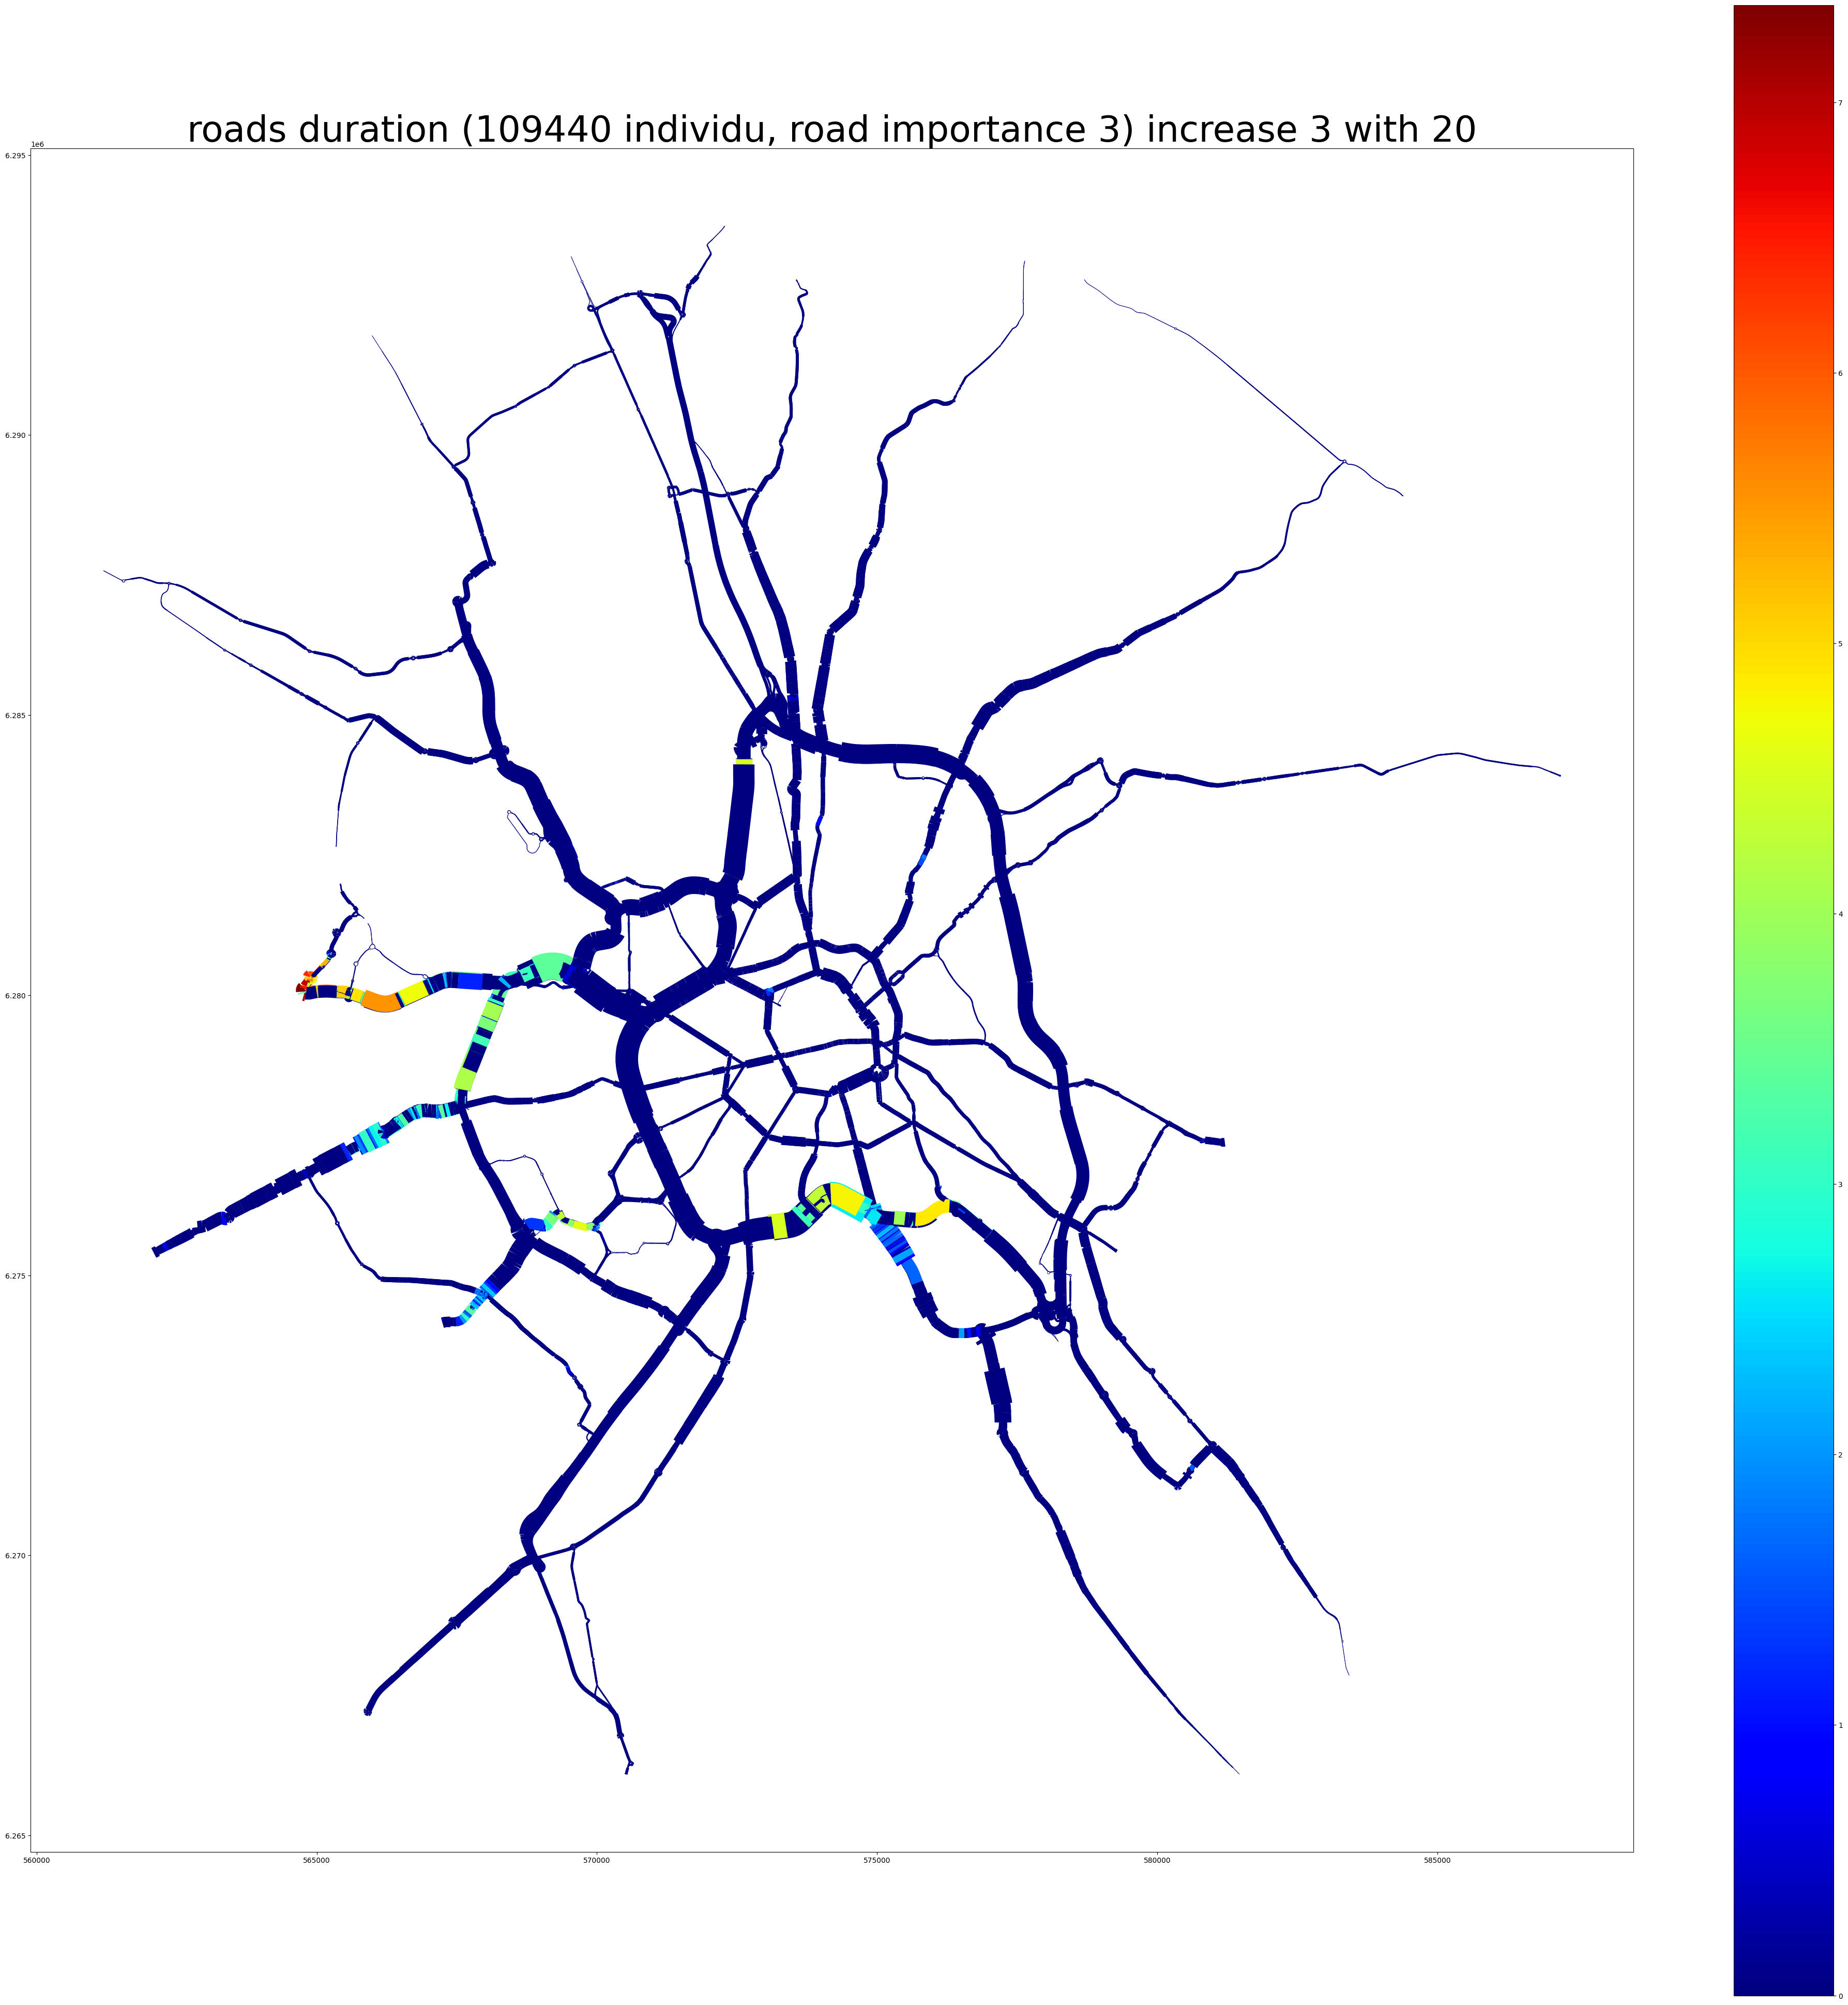

In [50]:
heatmap = roadMean.plot(figsize = (50,50), column=(roadMean["late mean"].map(lambda x : 0 if x<1 else math.log(x,))), legend=True, cmap='jet', linewidth=0.5+roadMean['frequentat']/2000)
heatmap.set_title("roads duration (109440 individu, road importance 3) increase 3 with 20",size='50')

In [ ]:
roadMean = gpd.read_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/meanMapNewPop.shp")
roadMeanTT = gpd.read_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/cheulouroute.shp")
roadMean.plot.box(column=['duration','late max','late mean'],logy=False,grid=True)
roadMeanTT.plot.box(column=['duration','late max','late mean'],logy=False,grid=True)

In [ ]:
np.max(gama_file['lateness'])

In [ ]:
etrange_route1 = gama_file.loc[gama_file['TopoId']=="'TRONROUT0000000073495825'"]
etrange_route2 = gama_file.loc[gama_file['TopoId']=="'TRONROUT0000000073477495'"]
#etrange_route1_late = etrange_route.loc[gama_file['lateness']>0]



#"distance": lambda x: list(np.unique(x))[0],\

In [ ]:
print(np.max(etrange_route1['lateness']))
print(np.max(etrange_route2['lateness']))


In [ ]:
groupby1 = etrange_route1.groupby(['activity'],group_keys=True).agg({"lateness":lambda x: np.max(x),'ID':'count'})
groupby2 = etrange_route2.groupby(['activity'],group_keys=True).agg({"lateness":lambda x: np.max(x),'ID':'count'})
print (groupby1)
print (groupby2)


#gama_file.groupby(['TopoId'],group_keys=True).agg({
#                                       "distance": lambda x: list(np.unique(x))[0],\

In [ ]:
gama_file = pd.read_csv("C:/Users/flavi/Travail/Switch-23/models/logs_file/latenessTT.csv")
gama_file

In [ ]:
count = gama_file.groupby(['activity'],group_keys=True).agg({"ID" : lambda x:len(list(x))})
count

In [92]:
baseScenario = gpd.read_file("C:/Users/flavi/Travail/Switch-23/DataScript/Map/shapefiles/latenessBase.shp")
comparedScenario = gpd.read_file("C:/Users/flavi/Travail/Switch-23/DataScript/Map/shapefiles/latenessIncrease3with20.shp")

In [94]:
def align_dataframes_by_topoid(df1, df2):
    # Vérifier si les colonnes "TopoId" existent dans les deux DataFrames
    if "TopoId" in df1.columns and "TopoId" in df2.columns:
        # Créer un ensemble des TopoId présents dans chaque DataFrame
        topo_ids_df1 = set(df1["TopoId"])
        topo_ids_df2 = set(df2["TopoId"])

        # Identifier les TopoId présents dans les deux DataFrames
        common_topo_ids = topo_ids_df1.intersection(topo_ids_df2)

        # Filtrer les lignes qui ne sont pas présentes dans les deux DataFrames
        df1 = df1[df1["TopoId"].isin(common_topo_ids)]
        df2 = df2[df2["TopoId"].isin(common_topo_ids)]

        return df1, df2
    else:
        print("Erreur: La colonne 'TopoId' est manquante dans au moins l'un des DataFrames.")
        return None, None

# Utilisation de la fonction align_dataframes_by_topoid avec vos DataFrames comparedScenario et baseScenario
comparedScenario, baseScenario = align_dataframes_by_topoid(comparedScenario, baseScenario)
comparedScenario = comparedScenario.reset_index()
baseScenario = baseScenario.reset_index()

Text(0.5, 1.0, 'diff between higway increased speed scenario and base scenario')

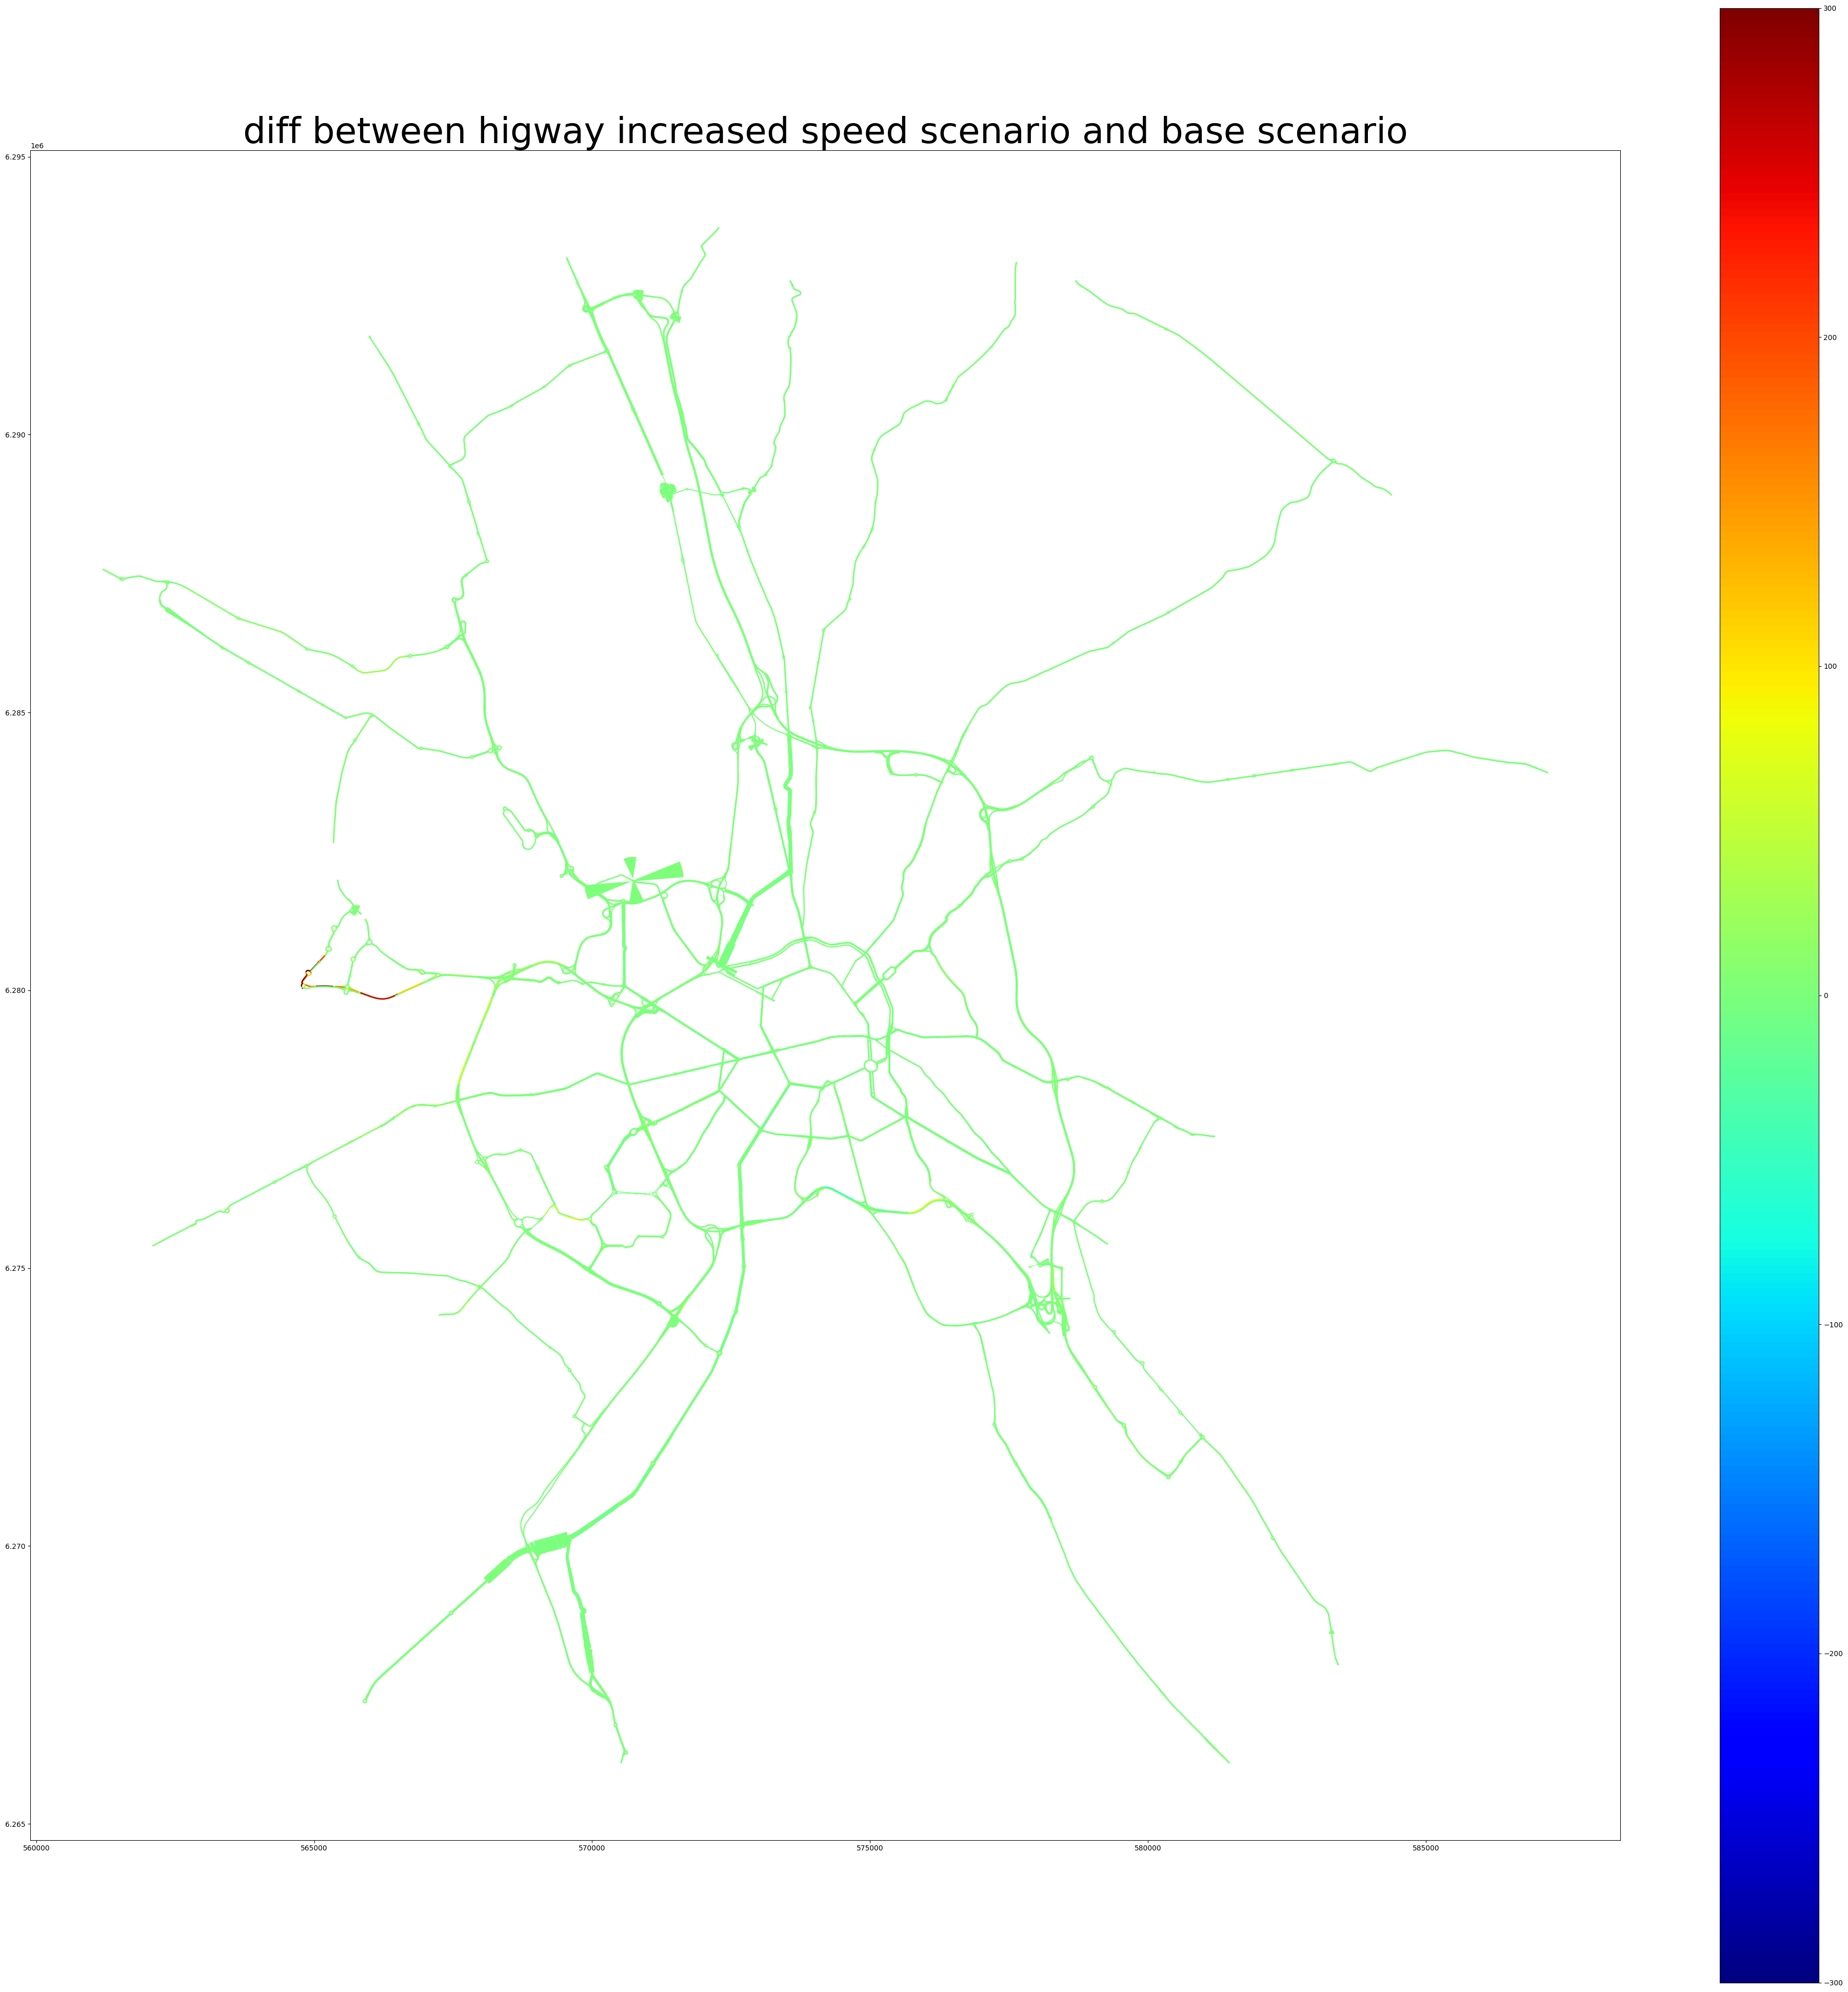

In [102]:
heatmap = comparedScenario.plot(figsize = (50,50), column=(comparedScenario["duration"]-baseScenario["duration"]), vmin=-300, vmax=300, legend=True, cmap='jet', linewidth=1/(baseScenario['frequentat']/comparedScenario["frequentat"]))
heatmap.set_title("diff between higway increased speed scenario and base scenario",size='50')